<a href="https://colab.research.google.com/github/brunopdrocha/SNLP_IBMEC/blob/main/05_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO 05 - Experimentos com CNNs**

Neste desafio, vamos trabalhar com dois conjuntos de dados para praticarmos e avaliarmos a performance de diferentes arquiteturas de Redes Neurais Convolucionais (CNNs).

## **CIFAR-10**

O conjunto de dados [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) (Canadian Institute For Advanced Research) é considerado uma evolução do dataset MNIST, consiste em 60.000 imagens coloridas de 32 x 32 em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

Os pontos importantes que distinguem este conjunto de dados do MNIST são:

- As imagens são coloridas no CIFAR-10 em comparação com a textura em preto e branco do MNIST;
- Cada imagem tem 32 x 32 pixels;
- 50.000 imagens de treinamento e 10.000 imagens de teste;
- Agora, essas imagens são tiradas em condições de iluminação variadas e em ângulos diferentes e, como são imagens coloridas, você verá que existem muitas variações na própria cor de objetos semelhantes (por exemplo, a cor da água do oceano).


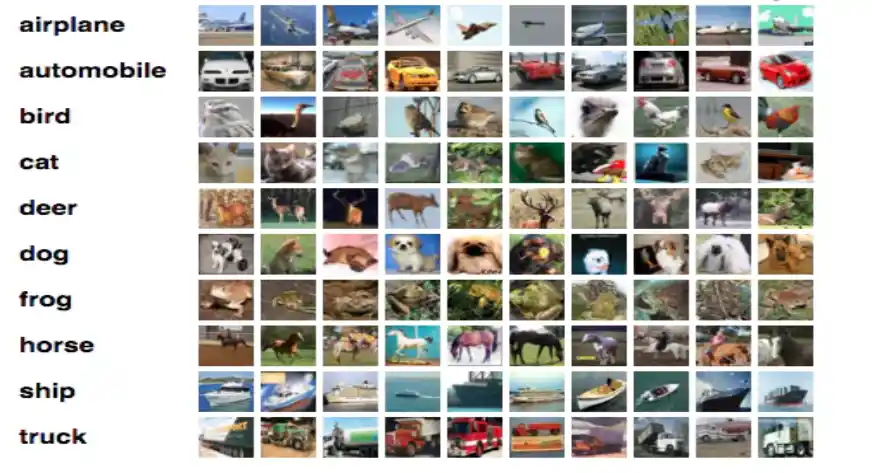

## **Fashion-MNIST**

O [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) é um conjunto de dados de imagens de artigos diversos, composto por um conjunto de treinamento com 60.000 exemplos e um conjunto de teste com 10.000 exemplos.

Cada exemplo é uma imagem em tons de cinza de 28x28, associada a um rótulo de 10 classes.

O Fashion-MNIST se oferece como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina. Ele compartilha o mesmo tamanho de imagem e a mesma estrutura de divisões de treinamento e teste.

Rótulos:

A cada exemplo de treinamento e teste é atribuído um dos seguintes rótulos:

- (`0`) T-shirt/top
- (`1`) Trouser
- (`2`) Pullover
- (`3`) Dress
- (`4`) Coat
- (`5`) Sandal
- (`6`) Shirt
- (`7`) Sneaker
- (`8`) Bag
- (`9`) Ankle boot

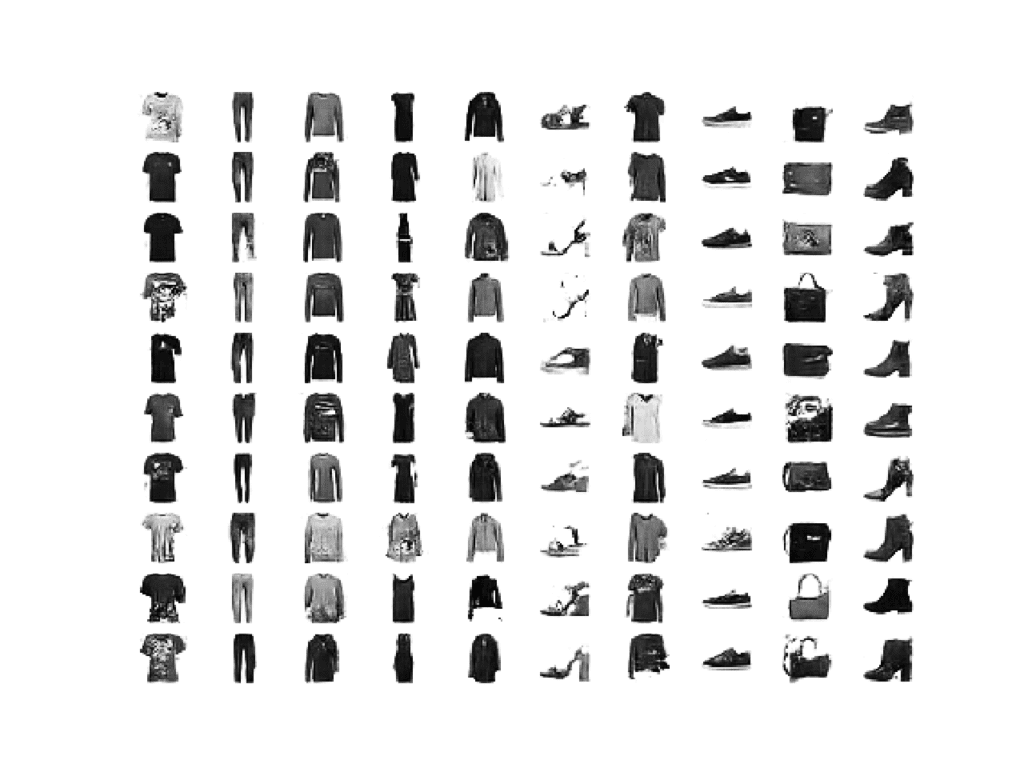

## **TAREFA**

O desafio consiste em explorar algumas abordagens de arquiteturas CNN nos dois datasets apresentados (CIFAR-10 e Fashin-MNIST). Você deverá implementar:

- Arquitetura CNN simples (apenas uma camada convolucional completa, seguida de uma *fully connected* simples).
- Arquitetura LeNet-5.
- Arquitetura AlexNet16

Ao final, faça uma comparação dos resultados para apresentação. Você e/ou seu grupo deverão apresentar as implementações, explicando passo a passo os modelos, bem como os resultados alcançados.

Caso esbarrem em limitações computacionais que afetem o resultado, garantam a execução da tarefa, mesmo que em menor escopo, documentando e propondo soluções. **A única máquina que poderá ser usada neste desafio é a máquina com a configuração gratuita do Google Colab**.

## CIFAR-10

### EDA


In [ ]:
# importando a biblioteca keras
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10

# Carregar o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Verificar a forma dos dados de treinamento
print("Tamanho amostra x_test:",x_test.shape)
print("Tamanho amostra x_train:",x_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Tamanho amostra x_test: (10000, 32, 32, 3)
Tamanho amostra x_train: (50000, 32, 32, 3)


In [ ]:
# Parâmetros
EPOCH = 50
BATCH_SIZE = 64
NB_CLASSES = 10
INPUT_SHAPE= (32,32,3)

### CNN Simples

In [ ]:
# Normalizar os pixels para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Criação do Modelo CNN
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(NB_CLASSES, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Sumario modelo CNN
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 464,538 (1.77 MB)

 Trainable params: 464,538 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilação modelo CNN
model_cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
# Treinar o modelo CNN
history_cnn = model_cnn.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE,validation_split=0.1,shuffle=True)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3794 - loss: 1.7928 - val_accuracy: 0.5668 - val_loss: 1.2530
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5821 - loss: 1.1833 - val_accuracy: 0.6132 - val_loss: 1.1426
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6339 - loss: 1.0575 - val_accuracy: 0.6258 - val_loss: 1.1165
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6592 - loss: 0.9738 - val_accuracy: 0.6386 - val_loss: 1.0722
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6861 - loss: 0.9118 - val_accuracy: 0.6088 - val_loss: 1.1507
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6951 - loss: 0.8756 - val_accuracy: 0.6324 - val_loss: 1.1092
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7180 - loss: 0.8184 - val_accuracy: 0.6502 - val_loss: 1.0611
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7299 - loss: 0.7866 - val_accuracy: 0.

In [ ]:
# Avaliar modelo CNN
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc,4))
print('Test loss:', round(test_loss,4))

# Making prediction in TEST set
predictions_cnn = model_cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5706 - loss: 2.4571
Test accuracy: 0.5682
Test loss: 2.5003
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Resultado em classifcation_report CNN
from sklearn.metrics import classification_report
y_pred_cnn = predictions_cnn.argmax(axis=1)
print(classification_report(y_test, y_pred_cnn))


              precision    recall  f1-score   support

           0       0.59      0.60      0.60      1000
           1       0.72      0.71      0.71      1000
           2       0.36      0.51      0.42      1000
           3       0.43      0.34      0.38      1000
           4       0.51      0.48      0.50      1000
           5       0.48      0.48      0.48      1000
           6       0.63      0.67      0.65      1000
           7       0.60      0.63      0.62      1000
           8       0.78      0.62      0.69      1000
           9       0.69      0.64      0.66      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



### LeNet-5




In [ ]:
models_lenet5 = models.Sequential([
        # Primeira camada convolucional (Conv 1)
        layers.Conv2D(6, kernel_size=(5, 5), padding='valid',
                     activation='tanh', input_shape=INPUT_SHAPE, strides=(1, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

        # Segunda camada convolucional (Conv 2)
        layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1),
                     activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

        # Terceira camada convolucional (Conv 3)
        layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1),
                     activation='tanh'),

        # Flatten
        layers.Flatten(),

        # Primeira camada totalmente conectada (Fully Connected 1)
        layers.Dense(84, activation='tanh'),

        # Camada de saída (Fully Connected 2)
        layers.Dense(NB_CLASSES, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
models_lenet5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilar o modelo
models_lenet5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Treinar o modelo
history_lenet = models_lenet5.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE,validation_split=0.1,shuffle=True)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3021 - loss: 1.9422 - val_accuracy: 0.3826 - val_loss: 1.7338
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4084 - loss: 1.6857 - val_accuracy: 0.4346 - val_loss: 1.5753
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4603 - loss: 1.5237 - val_accuracy: 0.4494 - val_loss: 1.5474
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4936 - loss: 1.4170 - val_accuracy: 0.5066 - val_loss: 1.3968
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5281 - loss: 1.3338 - val_accuracy: 0.5118 - val_loss: 1.3678
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5441 - loss: 1.2828 - val_accuracy: 0.5304 - val_loss: 1.3250
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5652 - loss: 1.2295 - val_accuracy: 0.5410 - val_loss: 1.2991
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5853 - loss: 1.1811 - val_accuracy: 0.

In [ ]:
# Avaliar
test_loss, test_acc = models_lenet5.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc,4))
print('Test loss:', round(test_loss,4))

# Making prediction in TEST set
predictions_lenet5 = models_lenet5.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5104 - loss: 2.1124
Test accuracy: 0.5096
Test loss: 2.1352
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Resultado em classifcation_report LENET5
from sklearn.metrics import classification_report
y_pred_lenet5 = predictions_lenet5.argmax(axis=1)
print(classification_report(y_test, y_pred_lenet5))


              precision    recall  f1-score   support

           0       0.53      0.61      0.57      1000
           1       0.68      0.60      0.64      1000
           2       0.42      0.38      0.40      1000
           3       0.34      0.32      0.33      1000
           4       0.44      0.48      0.46      1000
           5       0.40      0.42      0.41      1000
           6       0.54      0.59      0.57      1000
           7       0.57      0.55      0.56      1000
           8       0.64      0.59      0.61      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



### AlexNET-16

In [ ]:
model_alexNET = models.Sequential([
    # Input + Resize: 28×28×3 → 227×227×3
    layers.Resizing(227, 227, input_shape=INPUT_SHAPE),  # Input layer
    layers.Rescaling(1./255),                           # Normalização de pixels

    # Conv-1: 96 filtros, 11×11, stride 4 → mapa 55×55×96
    layers.Conv2D(96, (11,11), strides=4, padding='valid'),  # Conv1
    layers.BatchNormalization(),                            # BatchNorm após Conv1
    layers.Activation('relu'),                              # ReLU
    # Pool-1: 3×3, stride 2 → mapa 27×27×96
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),  # Pool1

    # Conv-2: 256 filtros, 5×5, pad=2 → mapa 27×27×256
    layers.Conv2D(256, (5,5), padding='same'),  # Conv2
    layers.BatchNormalization(),                # BatchNorm após Conv2
    layers.Activation('relu'),                  # ReLU
    # Pool-2: 3×3, stride 2 → mapa 13×13×256
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),  # Pool2

    # Conv-3: 384 filtros, 3×3, pad=1 → mapa 13×13×384
    layers.Conv2D(384, (3,3), padding='same'),  # Conv3
    layers.BatchNormalization(),                # BatchNorm
    layers.Activation('relu'),                  # ReLU

    # Conv-4: 384 filtros, 3×3, pad=1 → mapa 13×13×384
    layers.Conv2D(384, (3,3), padding='same'),  # Conv4
    layers.BatchNormalization(),                # BatchNorm
    layers.Activation('relu'),                  # ReLU

    # Conv-5: 256 filtros, 3×3, pad=1 → mapa 13×13×256
    layers.Conv2D(256, (3,3), padding='same'),  # Conv5
    layers.BatchNormalization(),                # BatchNorm
    layers.Activation('relu'),                  # ReLU
    # Pool-3: 3×3, stride 2 → mapa 6×6×256
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),  # Pool3

    # Dropout1 (rate=0.5) sobre 6×6×256
    layers.Dropout(0.5),  # Dropout1

    # Flatten → 6·6·256 = 9216
    layers.Flatten(),  # Flatten
    # FC-6 original: 4096 neurônios
    layers.Dense(4096, activation='relu'),  # FC6
    layers.Dropout(0.5),                    # Dropout entre FCs
    # FC-7 original: 4096 neurônios
    layers.Dense(4096, activation='relu'),  # FC7
    layers.Dropout(0.5),                    # Dropout entre FCs
    # FC-8 original: 1000 neurônios
    layers.Dense(1000, activation='relu'),  # FC8
    # Saída: NB_CLASSES neurônios + softmax
    layers.Dense(NB_CLASSES, activation='softmax')  # Output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Implementação de Summary do modelo
model_alexNET.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 62,393,858 (238.01 MB)

 Trainable params: 62,391,106 (238.00 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [ ]:
# Compilação model alexNET-16
model_alexNET.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

In [ ]:
# Treinar o modelo alexNET-16
history_alexNET = model_alexNET.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE,validation_split=0.1,shuffle=True)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.2152 - loss: 3.5600 - val_accuracy: 0.2426 - val_loss: 1.9734
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.3755 - loss: 1.6799 - val_accuracy: 0.1584 - val_loss: 2.2896
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.4791 - loss: 1.4321 - val_accuracy: 0.3448 - val_loss: 2.0144
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5406 - loss: 1.2855 - val_accuracy: 0.1496 - val_loss: 3.3490
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6123 - loss: 1.0941 - val_accuracy: 0.4916 - val_loss: 1.4162
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6529 - loss: 0.9943 - val_accuracy: 0.4326 - val_loss: 1.7035
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.6805 - loss: 0.9149 - val_accuracy: 0.2666 - val_loss: 2.1041
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7130 - loss: 0.8428 - 

In [ ]:
# Avaliar modelo alexNET-16
test_loss, test_acc = model_alexNET.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc,4))
print('Test loss:', round(test_loss,4))

# Making prediction in TEST set
predictions_alexNET= model_alexNET.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5809 - loss: 2.1215
Test accuracy: 0.5809
Test loss: 2.1334
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


In [ ]:
# Resultado em classifcation_report MNIST
from sklearn.metrics import classification_report
y_pred_alexNET = predictions_alexNET.argmax(axis=1)
print(classification_report(y_test, y_pred_alexNET))


              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1000
           1       0.76      0.90      0.82      1000
           2       0.58      0.48      0.53      1000
           3       0.32      0.62      0.42      1000
           4       0.83      0.22      0.34      1000
           5       0.96      0.11      0.20      1000
           6       0.66      0.73      0.69      1000
           7       0.94      0.49      0.64      1000
           8       0.43      0.96      0.60      1000
           9       0.88      0.63      0.73      1000

    accuracy                           0.58     10000
   macro avg       0.70      0.58      0.56     10000
weighted avg       0.70      0.58      0.56     10000

